<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-11-09 13:48:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  65.6MB/s    in 3.1s    

2025-11-09 13:48:56 (65.6 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [9]:
!pip install pandas
!pip install seaborn

In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 138.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 160.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 185.3 MB/s eta 0:00:00


<bound method DataFrame.info of    COUNT(*)
0     65437>

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [11]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [12]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [13]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [18]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [19]:
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL
  AND CompTotal IS NOT NULL
"""
df_age_comp = pd.read_sql_query(QUERY, conn)


In [20]:
df_age_comp["CompTotal"] = pd.to_numeric(df_age_comp["CompTotal"], errors="coerce")
df_age_comp.dropna(subset=["CompTotal"], inplace=True)


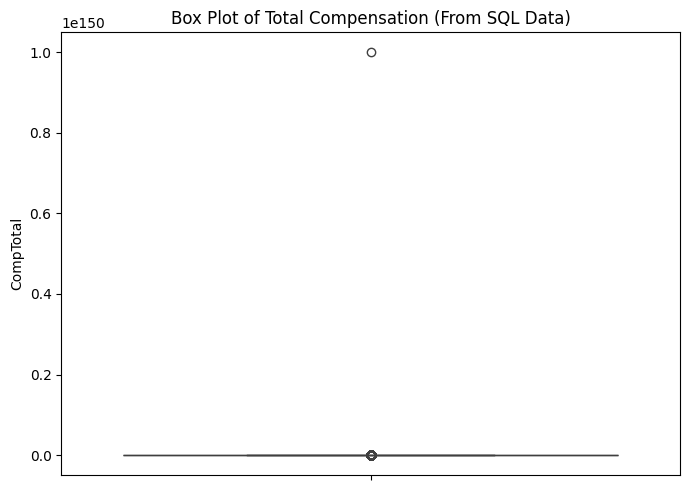

In [24]:
plt.figure(figsize=(7,5))
sns.boxplot(y=df_age_comp["CompTotal"])
plt.title("Box Plot of Total Compensation (From SQL Data)")
plt.ylabel("CompTotal")
plt.tight_layout()
plt.show()


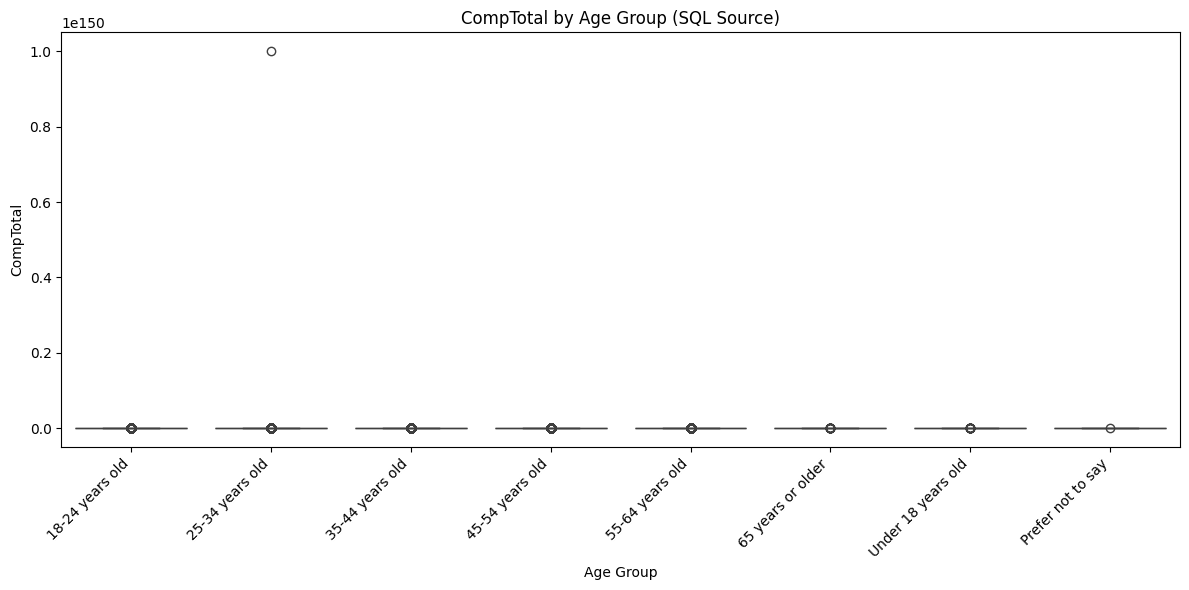

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_age_comp, x="Age", y="CompTotal")
plt.xticks(rotation=45, ha="right")
plt.title("CompTotal by Age Group (SQL Source)")
plt.xlabel("Age Group")
plt.ylabel("CompTotal")
plt.tight_layout()
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


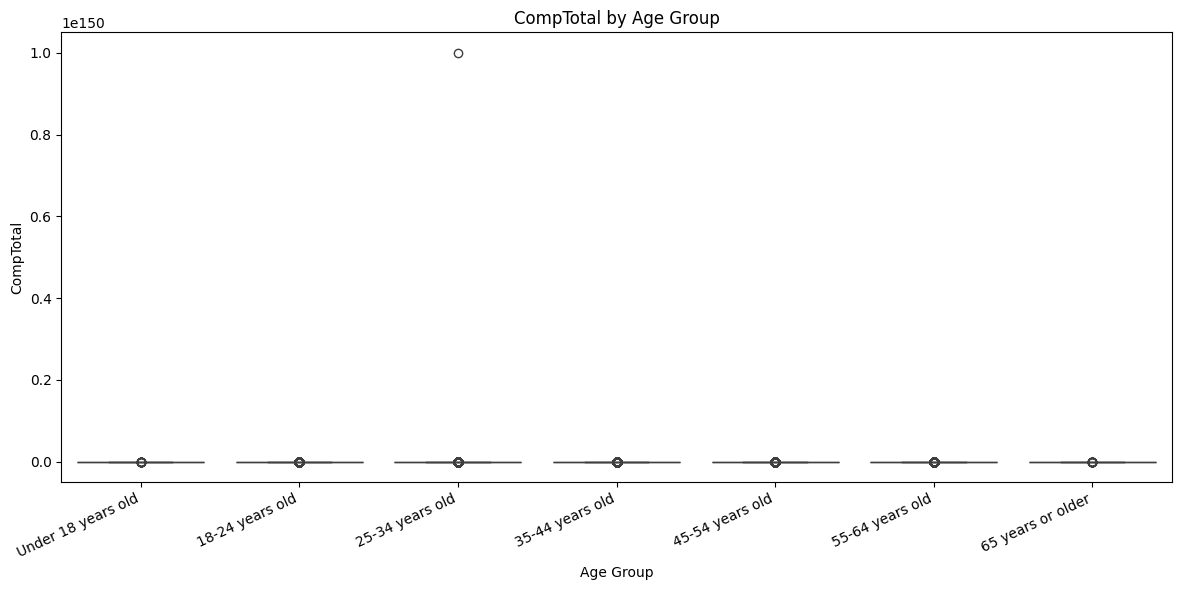

In [26]:
# your code goes here

# --- SQL: pull only what we need
q_age = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df_age = pd.read_sql_query(q_age, conn)

# --- clean types
df_age["CompTotal"] = pd.to_numeric(df_age["CompTotal"], errors="coerce")
df_age = df_age.dropna(subset=["CompTotal", "Age"])

# optional: order the age bands for nicer x-axis
age_order = [
    'Under 18 years old','18-24 years old','25-34 years old',
    '35-44 years old','45-54 years old','55-64 years old','65 years or older'
]
df_age["Age"] = pd.Categorical(df_age["Age"], categories=age_order, ordered=True)

# --- plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_age, x="Age", y="CompTotal")
# plt.yscale("log")  # uncomment if very skewed
plt.title("CompTotal by Age Group")
plt.xlabel("Age Group"); plt.ylabel("CompTotal")
plt.xticks(rotation=25, ha="right")
plt.tight_layout(); plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


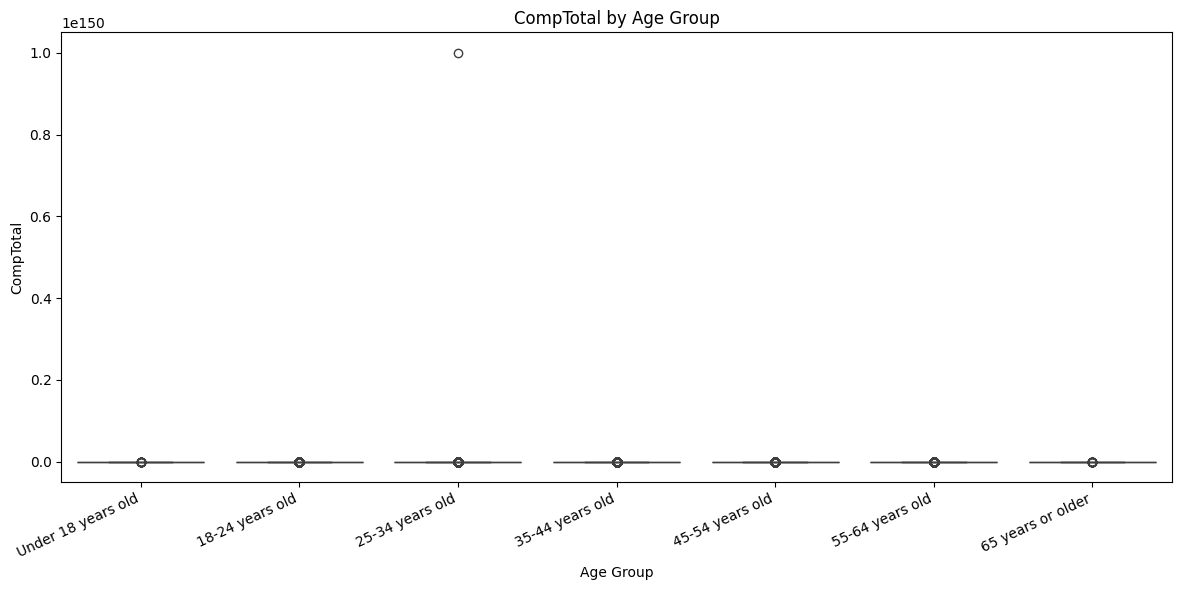

In [28]:
# your code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- SQL: pull only what we need
q_age = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df_age = pd.read_sql_query(q_age, conn)

# --- clean types
df_age["CompTotal"] = pd.to_numeric(df_age["CompTotal"], errors="coerce")
df_age = df_age.dropna(subset=["CompTotal", "Age"])

# optional: order the age bands for nicer x-axis
age_order = [
    'Under 18 years old','18-24 years old','25-34 years old',
    '35-44 years old','45-54 years old','55-64 years old','65 years or older'
]
df_age["Age"] = pd.Categorical(df_age["Age"], categories=age_order, ordered=True)

# --- plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_age, x="Age", y="CompTotal")
# plt.yscale("log")  # uncomment if very skewed
plt.title("CompTotal by Age Group")
plt.xlabel("Age Group"); plt.ylabel("CompTotal")
plt.xticks(rotation=25, ha="right")
plt.tight_layout(); plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


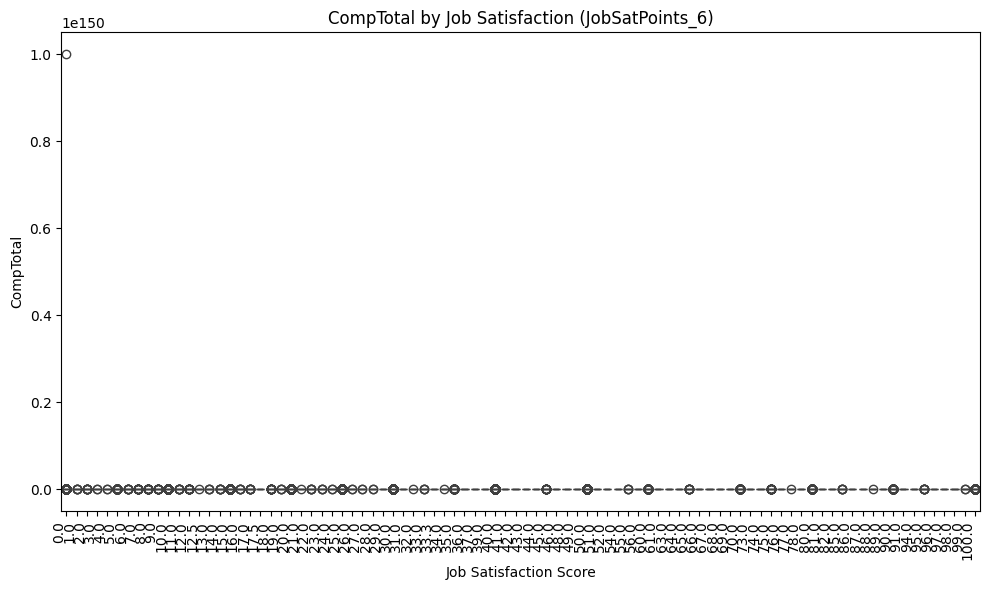

In [30]:
# your code goes here
q_js = """
SELECT JobSatPoints_6, CompTotal
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL
"""
df_js = pd.read_sql_query(q_js, conn)

df_js["CompTotal"] = pd.to_numeric(df_js["CompTotal"], errors="coerce")
df_js["JobSatPoints_6"] = pd.to_numeric(df_js["JobSatPoints_6"], errors="coerce")
df_js = df_js.dropna(subset=["CompTotal","JobSatPoints_6"])

plt.figure(figsize=(10,6))
sns.boxplot(data=df_js, x="JobSatPoints_6", y="CompTotal")
# plt.yscale("log")
plt.title("CompTotal by Job Satisfaction (JobSatPoints_6)")
plt.xlabel("Job Satisfaction Score"); plt.ylabel("CompTotal")
plt.xticks(rotation=90, ha="right")
plt.tight_layout(); plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


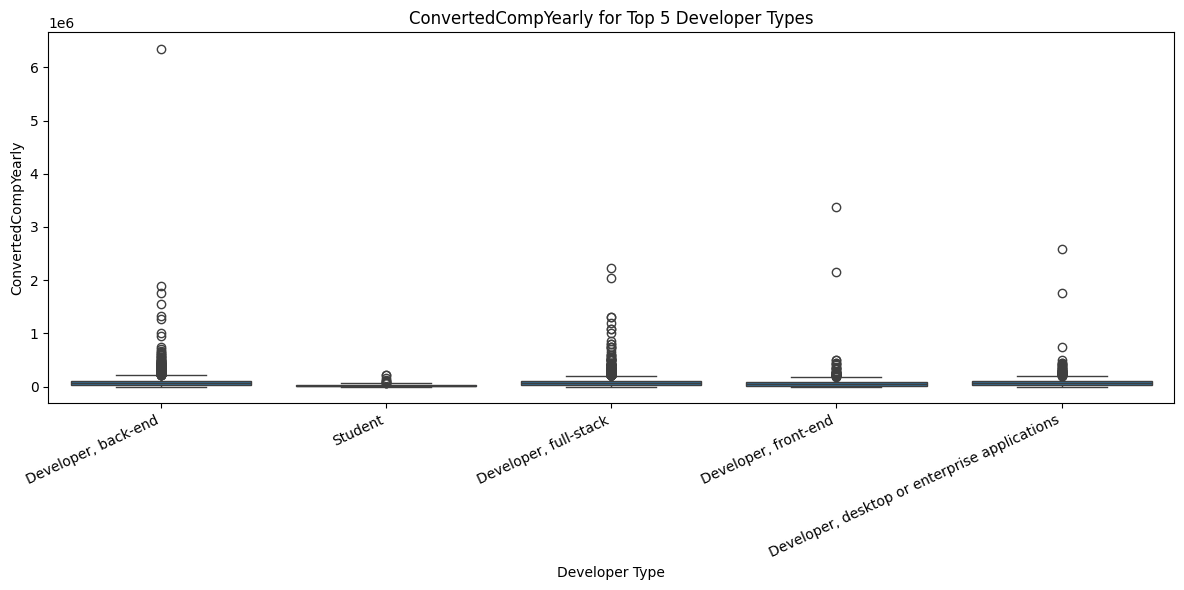

In [31]:
# your code goes here
dev_col = "DevType"  # <-- change if your column is named differently

# --- SQL: find top 5 developer types
q_top_dev = f"""
SELECT {dev_col} AS Dev, COUNT(*) AS n
FROM main
WHERE {dev_col} IS NOT NULL
GROUP BY {dev_col}
ORDER BY n DESC
LIMIT 5
"""
top5_dev = pd.read_sql_query(q_top_dev, conn)["Dev"].tolist()

# --- SQL: pull rows only for those top 5 types
q_dev_rows = f"""
SELECT {dev_col} AS Dev, ConvertedCompYearly
FROM main
WHERE {dev_col} IN ({','.join(['?']*len(top5_dev))})
  AND ConvertedCompYearly IS NOT NULL
"""
df_dev = pd.read_sql_query(q_dev_rows, conn, params=top5_dev)

df_dev["ConvertedCompYearly"] = pd.to_numeric(df_dev["ConvertedCompYearly"], errors="coerce")
df_dev = df_dev.dropna(subset=["ConvertedCompYearly","Dev"])

plt.figure(figsize=(12,6))
sns.boxplot(data=df_dev, x="Dev", y="ConvertedCompYearly")
# plt.yscale("log")
plt.title("ConvertedCompYearly for Top 5 Developer Types")
plt.xlabel("Developer Type"); plt.ylabel("ConvertedCompYearly")
plt.xticks(rotation=25, ha="right")
plt.tight_layout(); plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


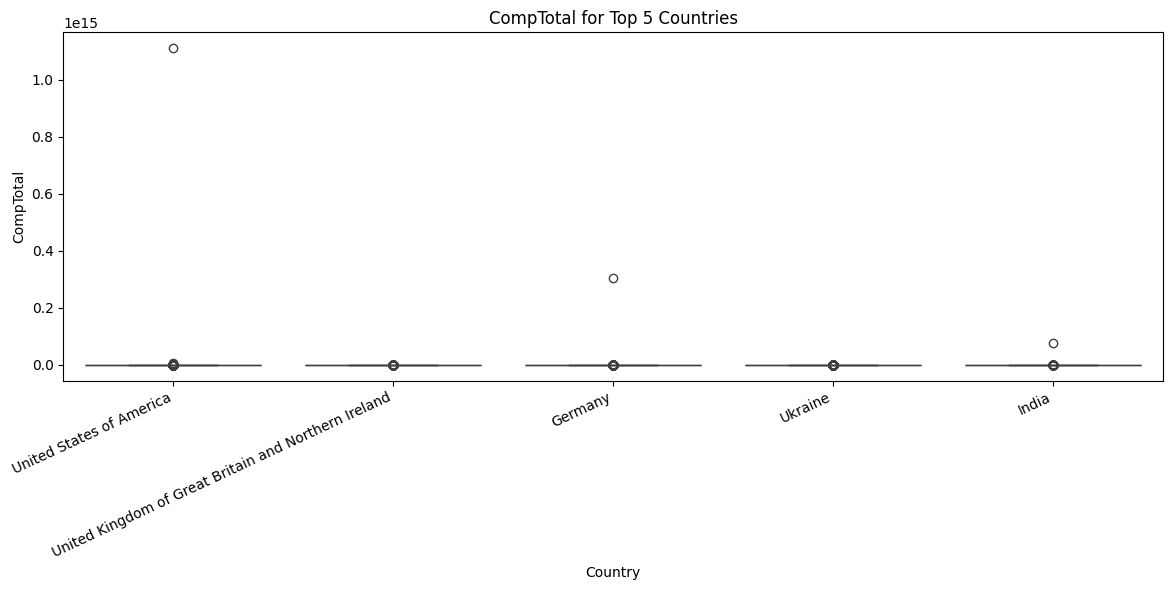

In [32]:
# your code goes here
# --- SQL: get top 5 countries by count
q_top_ctry = """
SELECT Country, COUNT(*) AS n
FROM main
WHERE Country IS NOT NULL
GROUP BY Country
ORDER BY n DESC
LIMIT 5
"""
top5_ctry = pd.read_sql_query(q_top_ctry, conn)["Country"].tolist()

# --- SQL: rows for those countries with CompTotal
q_ctry_rows = f"""
SELECT Country, CompTotal
FROM main
WHERE Country IN ({','.join(['?']*len(top5_ctry))})
  AND CompTotal IS NOT NULL
"""
df_ctry = pd.read_sql_query(q_ctry_rows, conn, params=top5_ctry)

df_ctry["CompTotal"] = pd.to_numeric(df_ctry["CompTotal"], errors="coerce")
df_ctry = df_ctry.dropna(subset=["CompTotal","Country"])

plt.figure(figsize=(12,6))
sns.boxplot(data=df_ctry, x="Country", y="CompTotal")
# plt.yscale("log")
plt.title("CompTotal for Top 5 Countries")
plt.xlabel("Country"); plt.ylabel("CompTotal")
plt.xticks(rotation=25, ha="right")
plt.tight_layout(); plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_299/2953142669.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


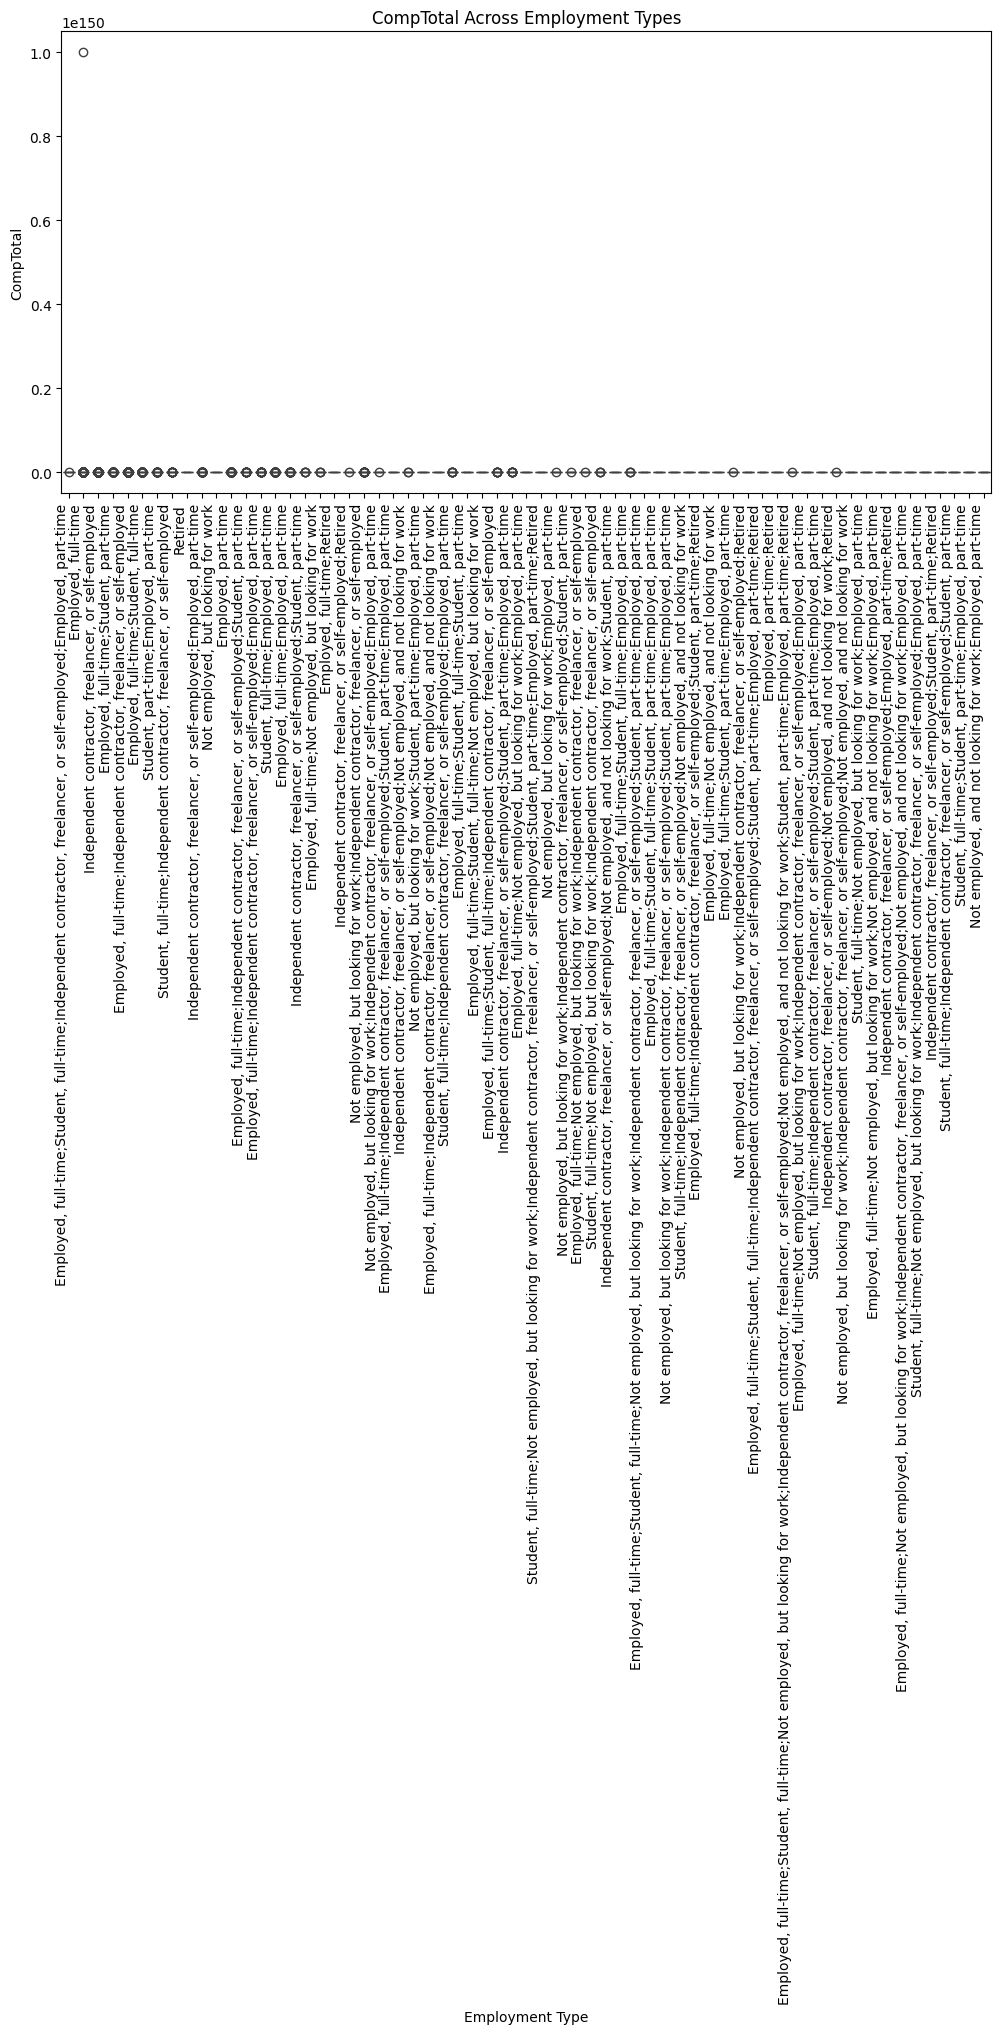

In [34]:
# your code goes here


# --- SQL: extract Employment + CompTotal
QUERY = """
SELECT Employment, CompTotal
FROM main
WHERE Employment IS NOT NULL
  AND CompTotal IS NOT NULL
"""
df_emp = pd.read_sql_query(QUERY, conn)

# --- clean compensation to numeric
df_emp["CompTotal"] = pd.to_numeric(df_emp["CompTotal"], errors="coerce")
df_emp = df_emp.dropna(subset=["CompTotal", "Employment"])

# --- plot boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_emp, x="Employment", y="CompTotal")
# plt.yscale("log")   # enable if compensation is skewed
plt.title("CompTotal Across Employment Types")
plt.xlabel("Employment Type")
plt.ylabel("CompTotal")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


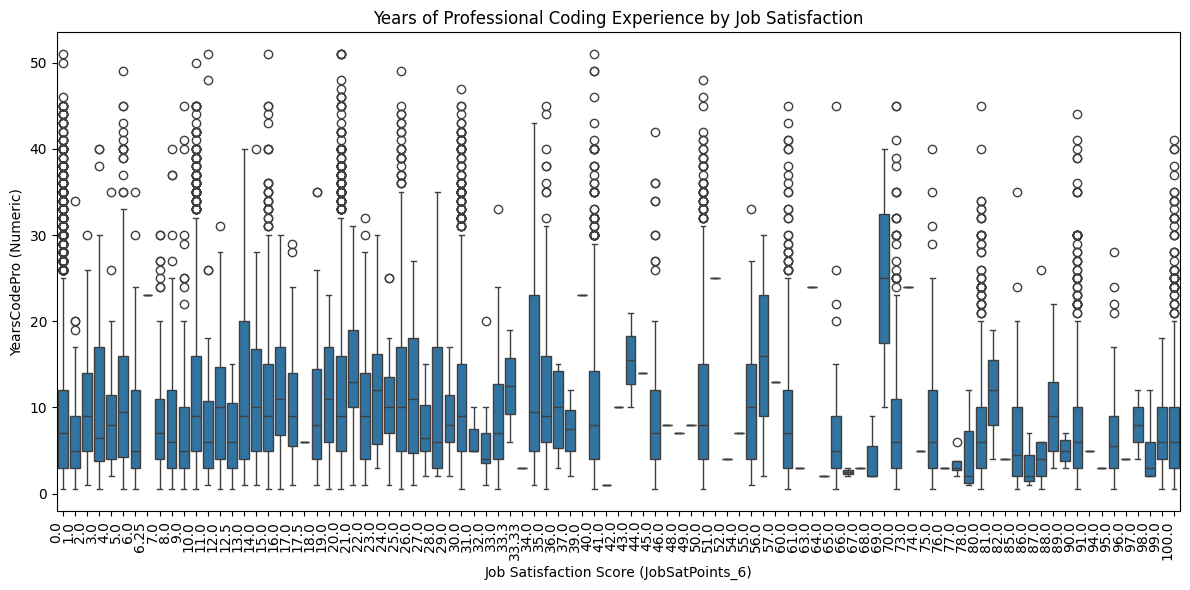

In [36]:
# your code goes here
# --- SQL: get coding years + job satisfaction
QUERY = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL
  AND JobSatPoints_6 IS NOT NULL
"""
df_code = pd.read_sql_query(QUERY, conn)

# --- convert YearsCodePro to numeric
import numpy as np
import re

def years_to_num(s):
    if pd.isna(s): return np.nan
    s = str(s).strip().lower()
    if s.startswith("less than 1"): return 0.5
    if s.startswith("more than 50"): return 51
    m = re.search(r"\d+(\.\d+)?", s)
    return float(m.group()) if m else np.nan

df_code["YearsCodePro_num"] = df_code["YearsCodePro"].map(years_to_num)
df_code["JobSatPoints_6"] = pd.to_numeric(df_code["JobSatPoints_6"], errors="coerce")

df_code = df_code.dropna(subset=["YearsCodePro_num", "JobSatPoints_6"])

# --- boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_code, x="JobSatPoints_6", y="YearsCodePro_num")
plt.title("Years of Professional Coding Experience by Job Satisfaction")
plt.xlabel("Job Satisfaction Score (JobSatPoints_6)")
plt.ylabel("YearsCodePro (Numeric)")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [37]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
